In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:\\Users\\TOJMARK LTD\\Twitter Sentiments.csv")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


I have loaded the "Twitter Sentiments" dataset and displayed the first few rows using data.head(). I am now ready to analyze and explore the sentiment data to gain insights, conduct sentiment analysis, or perform any other relevant tasks based on the dataset's contents.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# TEXT PREPROCESSING

In [9]:
#Let clean the data
def clean_tweets(data):
    def remove_patterns(tweet):
        # Remove mentions (@user)
        tweet = re.sub(r'@[^\s]+', '', tweet)

        # Removing special characters and numbers, except hashtags (#)
        tweet = re.sub(r'[^\w\s#]', '', tweet)

        # Converting to lowercase
        tweet = tweet.lower()

        # Removing extra whitespaces
        tweet = re.sub(r'\s+', ' ', tweet).strip()

        return tweet

    data['clean_tweet'] = data['tweet'].apply(remove_patterns)

    return data

# Example usage:
data = clean_tweets(data)
data.head()

,id,label,tweet,clean_tweet
0,1,0,when a father is dysfunctional and is so selfi...,when a father is dysfunctional and is so selfi...
1,2,0,thanks for #lyft credit i cant use cause they ...,thanks for #lyft credit i cant use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ur...,#model i love u take with u all the time in ur...
4,5,0,factsguide society now #motivation,factsguide society now #motivation


In [7]:
# Droping the 'tweet' column from the DataFrame
data.drop(columns=['tweet'], inplace=True)

# Renaming the 'clean_tweet' column back to 'tweet'
data.rename(columns={'clean_tweet': 'tweet'}, inplace=True)

data.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfi...
1,2,0,thanks for #lyft credit i cant use cause they ...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ur...
4,5,0,factsguide society now #motivation


In [8]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

# Removing short words

Removing short words (e.g., articles, prepositions) is beneficial in text processing because they often carry little meaningful information for analysis or modeling. Eliminating such words reduces noise, saves memory, and enhances the efficiency of natural language processing tasks like sentiment analysis, topic modeling, and text classification.

In [10]:
# Define a custom function to remove words with length less than 3
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) >= 3])

# Apply the custom function to the 'tweet' column
data['tweet'] = data['tweet'].apply(remove_short_words)

# Display the DataFrame with removed short words
data.head()

,id,label,tweet,clean_tweet
0,1,0,when father dysfunctional and selfish drags hi...,when a father is dysfunctional and is so selfi...
1,2,0,thanks for #lyft credit cant use cause they do...,thanks for #lyft credit i cant use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model love take with all the time urð ðððð ððð,#model i love u take with u all the time in ur...
4,5,0,factsguide society now #motivation,factsguide society now #motivation


# Text Tokenisation Process

Text tokenization is necessary to break down text into individual tokens (words or subwords) to facilitate natural language processing tasks. It enables accurate analysis, classification, and modeling by converting textual data into structured and meaningful representations, allowing algorithms to understand and process text effectively.

In [11]:
import nltk
from nltk.tokenize import word_tokenize

# Download the required nltk data
nltk.download('punkt')

# Tokenize the 'tweet' column
data['tweet_token'] = data['tweet'].apply(word_tokenize)
data.head()

[nltk_data] Downloading package punkt to C:\Users\TOJMARK
[nltk_data]     LTD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,label,tweet,clean_tweet,tweet_token
0,1,0,when father dysfunctional and selfish drags hi...,when a father is dysfunctional and is so selfi...,"[when, father, dysfunctional, and, selfish, dr..."
1,2,0,thanks for #lyft credit cant use cause they do...,thanks for #lyft credit i cant use cause they ...,"[thanks, for, #, lyft, credit, cant, use, caus..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model love take with all the time urð ðððð ððð,#model i love u take with u all the time in ur...,"[#, model, love, take, with, all, the, time, u..."
4,5,0,factsguide society now #motivation,factsguide society now #motivation,"[factsguide, society, now, #, motivation]"


# WORD STEMMING

Stemming is the process of reducing words to their root or base form, removing suffixes or prefixes. It helps in simplifying the words and consolidating variations of the same word. This reduces the vocabulary size, enhances text processing, and improves information retrieval in natural language processing tasks.

In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Create a stemmer
stemmer = PorterStemmer()

# Function to apply stemming to a list of tokens
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to the 'tweet_tokens' column
data_stemmed= data['tweet_token'].apply(stem_tokens)


# Display the DataFrame with stemmed tokens
data_stemmed.head()

0    [when, father, dysfunct, and, selfish, drag, h...
1    [thank, for, #, lyft, credit, cant, use, caus,...
2                              [bihday, your, majesti]
3    [#, model, love, take, with, all, the, time, u...
4                  [factsguid, societi, now, #, motiv]
Name: tweet_token, dtype: object

# JOINING TOKEN WORDS TOGETHER

In [14]:
# Function to join the tokens back into a sentence
def join_tokens(tokens):
    return ' '.join(tokens)

# Apply the join_tokens function to the 'stemmed_tokens' column
data['tweet_token'] = data['tweet_token'].apply(join_tokens)

# Display the DataFrame with the stemmed tweet
data.head()

,id,label,tweet,clean_tweet,tweet_token
0,1,0,when father dysfunctional and selfish drags hi...,when a father is dysfunctional and is so selfi...,when father dysfunctional and selfish drags hi...
1,2,0,thanks for #lyft credit cant use cause they do...,thanks for #lyft credit i cant use cause they ...,thanks for # lyft credit cant use cause they d...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model love take with all the time urð ðððð ððð,#model i love u take with u all the time in ur...,# model love take with all the time urð ðððð ððð
4,5,0,factsguide society now #motivation,factsguide society now #motivation,factsguide society now # motivation


# EXOLORATION DATA ANALISIS (EDA)

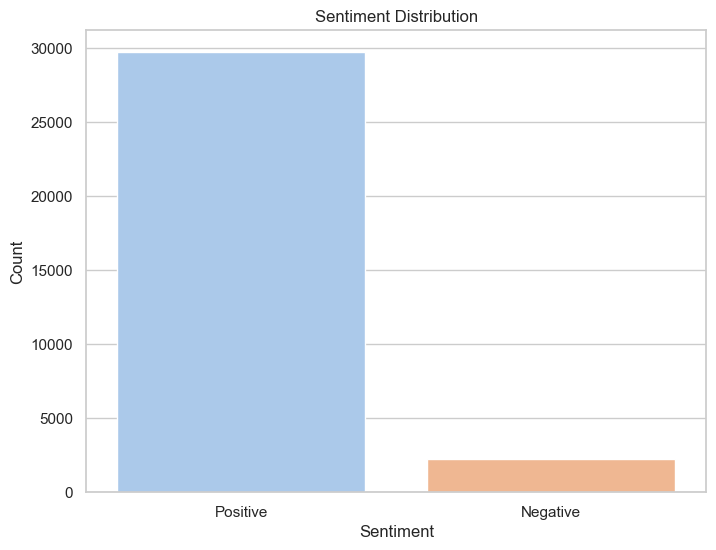

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Function to determine sentiment based on label
def get_sentiment(label):
    return 'Positive' if label == 0 else 'Negative'

# Apply get_sentiment to create a new column 'sentiment' in the DataFrame
data['sentiment'] = data['label'].apply(get_sentiment)

# Word cloud for positive tweets
positive_tweets = data[data['sentiment'] == 'Positive']['tweet'].str.cat(sep=' ')
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

# Word cloud for negative tweets
negative_tweets = data[data['sentiment'] == 'Negative']['tweet'].str.cat(sep=' ')
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

# Bar chart for sentiment distribution
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

(-0.5, 799.5, 399.5, -0.5)

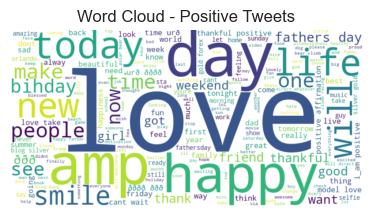

In [16]:
# Display word clouds for positive
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Tweets')
plt.axis('off')

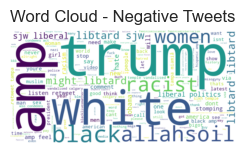

In [17]:
# Display word clouds for negative tweets
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Tweets')
plt.axis('off')
plt.show()

# Visualising Frequent Words

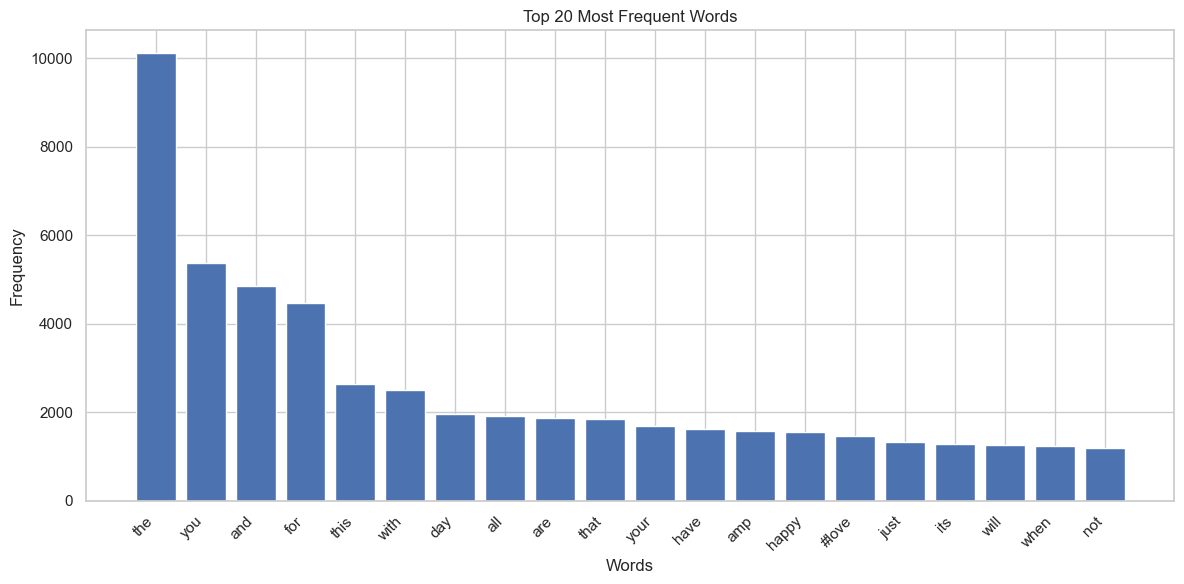

In [18]:
from collections import Counter

# Function to count word frequency
def count_words(text):
    words = text.split()
    return Counter(words)

# Apply count_words to the tweet  column
word_counts = data['tweet'].apply(count_words)

# Combine word counts from all tweets
total_word_counts = Counter()
for word_count in word_counts:
    total_word_counts += word_count

# Get the top N most frequent words
top_n = 20
most_common_words = total_word_counts.most_common(top_n)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(top_n), [count for word, count in most_common_words], tick_label=[word for word, count in most_common_words])
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

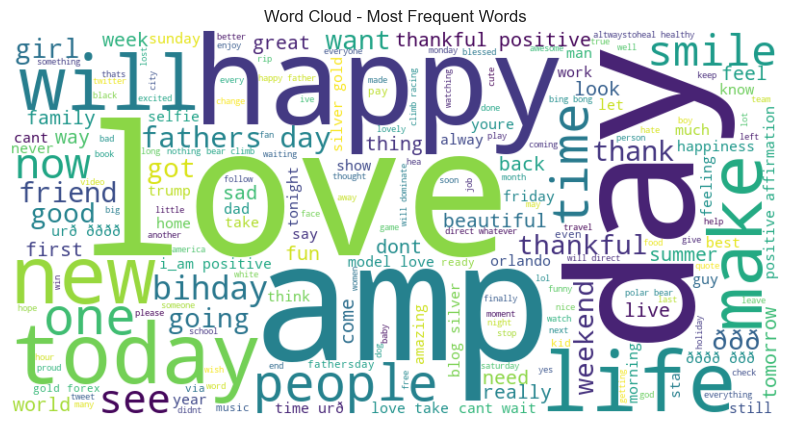

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned tweets into a single string
all_tweets = " ".join(data['tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Most Frequent Words')
plt.axis('off')
plt.show()

# EXTRACTING HASHTAG FOR POSITIVE AND NEGATIVE WORDS

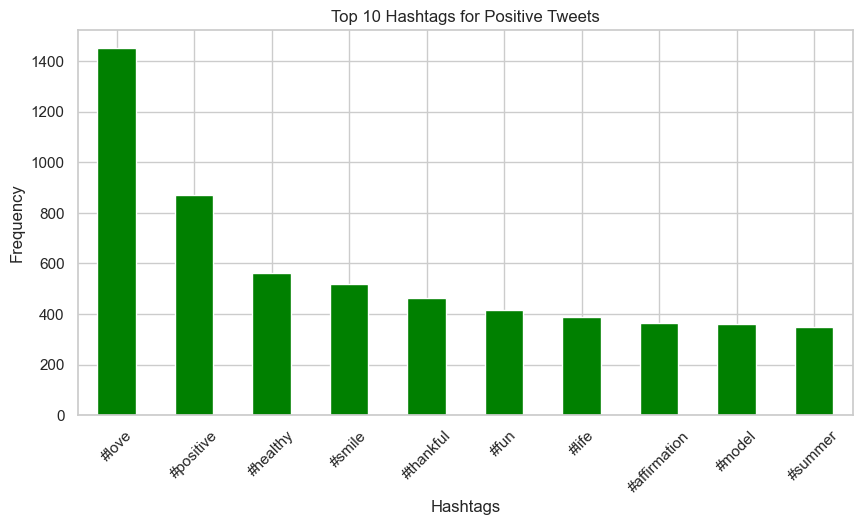

In [21]:
# Extracting hashtags for positive tweets
positive_hashtags = " ".join(data.loc[data['label'] == 0, 'tweet'])
positive_hashtags = [tag for tag in positive_hashtags.split() if tag.startswith('#')]

# Counting the occurrences of each hashtag
if positive_hashtags:
    positive_hashtag_counts = pd.Series(positive_hashtags).value_counts()
    
    # Selecting the top ten hashtags for positive tweets
    top_positive_hashtags = positive_hashtag_counts.nlargest(10)

    # Ploting the bar chart for top ten positive hashtags
    plt.figure(figsize=(10, 5))
    top_positive_hashtags.plot(kind='bar', color='green')
    plt.title('Top 10 Hashtags for Positive Tweets')
    plt.xlabel('Hashtags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No hashtags found in positive tweets.")

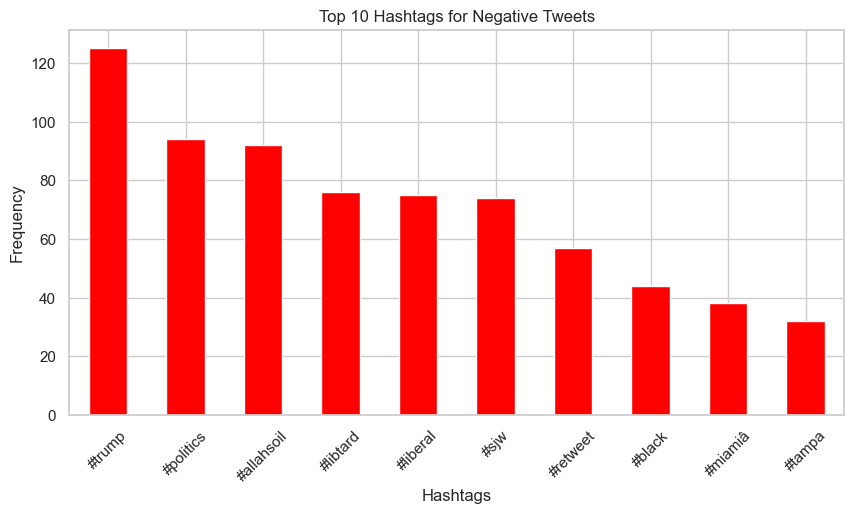

In [22]:
# Extract hashtags for negative tweets
negative_hashtags = " ".join(data.loc[data['label'] == 1, 'tweet'])
negative_hashtags = [tag for tag in negative_hashtags.split() if tag.startswith('#')]

# Count the occurrences of each hashtag
if negative_hashtags:
    negative_hashtag_counts = pd.Series(negative_hashtags).value_counts()

    # Select the top ten hashtags for negative tweets
    top_negative_hashtags = negative_hashtag_counts.nlargest(10)

    # Plot the bar chart for top ten negative hashtags
    plt.figure(figsize=(10, 5))
    top_negative_hashtags.plot(kind='bar', color='red')
    plt.title('Top 10 Hashtags for Negative Tweets')
    plt.xlabel('Hashtags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No hashtags found in negative tweets.")

# SENTIMENTAL ANALYSIS

To perform this, Input splitting is an essential step in natural language processing tasks like text classification, sentiment analysis, and topic modeling. It involves dividing the dataset into training and testing sets. The training set is used to build the machine learning model, and the testing set is used to evaluate its performance on unseen data. This process ensures that the model generalizes well to new, unseen data and helps prevent overfitting. Splitting the data is crucial to measure how well the model performs on real-world data and to avoid bias in evaluating its effectiveness.

# Using TF-IDF To Convert text to numerical vector

To convert text data into a numerical vector for machine learning, we use text vectorization techniques like Count Vectorization or TF-IDF (Term Frequency-Inverse Document Frequency). These methods transform text into a numerical format by representing each document as a vector of word frequencies or term importance scores, respectively. This allows us to apply machine learning algorithms that work with numerical data.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data['tweet']
y = data['label']

# Split the data into training set and test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the training data into a numerical vector
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data into a numerical vector using the same vocabulary as the training data
X_test_vectorized = vectorizer.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Create Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_vectorized, y_train)
y_pred_logreg = logreg_model.predict(X_test_vectorized)

# Create Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
y_pred_nb = nb_model.predict(X_test_vectorized)

# Calculate F1 score and accuracy for both models
f1_logreg = f1_score(y_test, y_pred_logreg)
f1_nb = f1_score(y_test, y_pred_nb)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Logistic Regression:")
print(f"F1 Score: {f1_logreg}")
print(f"Accuracy: {accuracy_logreg}")

print("\nNaive Bayes:")
print(f"F1 Score: {f1_nb}")
print(f"Accuracy: {accuracy_nb}")

Logistic Regression:
F1 Score: 0.631578947368421
Accuracy: 0.9583919912404192

Naive Bayes:
F1 Score: 0.5756240822320117
Accuracy: 0.9547943062724855


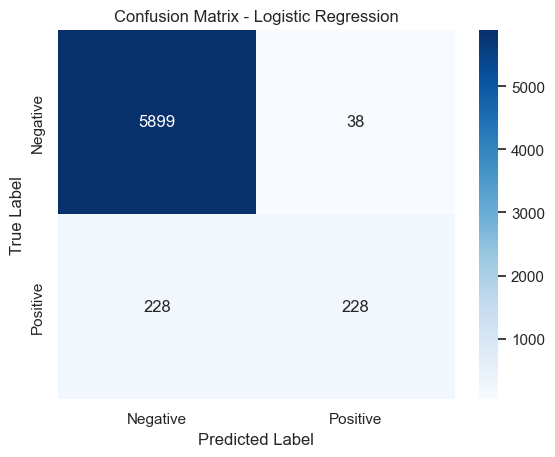

In [26]:
# Visualize the confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

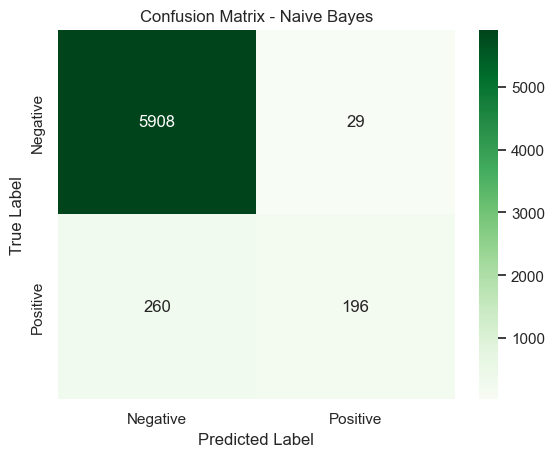

In [27]:
# Visualize the confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
